## Import libraries

In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
from fastai.vision import *
from minigooglenet import *
bs=128

In [15]:
path = Path("../data/cifar10")

# Importing Data

In [16]:
data = (ImageList
        .from_folder(path)
        .split_by_folder(train = 'train', valid = 'test')
        .label_from_folder()
        .transform(tfms=None, size = 32)
        .databunch(bs=bs)
        .normalize())

In [17]:
data.train_ds

LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: ..\data\cifar10

In [18]:
data.valid_ds

LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: ..\data\cifar10

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10


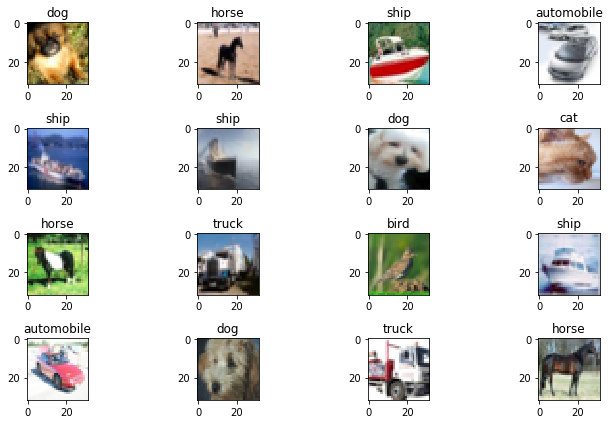

In [8]:
print(data.classes) ## Prints class labels
print(data.c) ## Prints number of classes
data.show_batch(rows=4, figsize=(10,6), hide_axis=False) ## Show sample data

## Traning

In [32]:
## Defining the learner
minigooglenet_learner = Learner(data=data, 
                          model=MiniGoogLeNet(n_class=data.c, size = 32, depth=3), 
                          loss_func=nn.CrossEntropyLoss(),
                          metrics=accuracy)

In [33]:
minigooglenet_learner.model

MiniGoogLeNet(
  (conv0): BasicConv2d(
    (conv): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(96, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (inception1a): InceptionModule(
    (conv0): BasicConv2d(
      (conv): Conv2d(96, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv1): BasicConv2d(
      (conv): Conv2d(96, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (inception1b): InceptionModule(
    (conv0): BasicConv2d(
      (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv1): BasicConv2d(
      (conv): Conv2d(64, 48, kernel_size=(3, 3), stride=(1, 1), 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


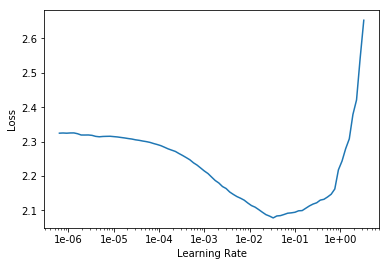

In [11]:
## Finidng Ideal learning late
minigooglenet_learner.lr_find()
minigooglenet_learner.recorder.plot()

In [12]:
minigooglenet_learner.fit_one_cycle(10, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.133374,1.855449,0.434200,05:08
1,0.886658,0.975343,0.662300,03:37
2,0.717497,1.713797,0.510600,03:19
3,0.553750,0.705627,0.762600,03:34
4,0.454479,0.575449,0.807100,03:38
5,0.346508,0.544544,0.823700,03:35
6,0.236038,0.415669,0.869000,03:38
7,0.137269,0.404362,0.883000,05:13
8,0.071512,0.400382,0.884300,03:41
9,0.045676,0.409498,0.888400,05:09


In [14]:
minigooglenet_learner.save('minigooglenet_stage_1')

In [34]:
minigooglenet_learner.load('minigooglenet_stage_1')

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: ..\data\cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: ..\data\cifar10;

Test: None, model=MiniGoogLeNet(
  (conv0): BasicConv2d(
    (conv): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(96, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (inception1a): InceptionModule(
    (conv0): BasicConv2d(
      (conv): Conv2d(96, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv1): BasicConv2d(
      (conv): Conv2d(96, 32, ker

In [23]:
from sklearn.metrics import classification_report
interp = ClassificationInterpretation.from_learner(minigooglenet_learner)
print(classification_report(interp.y_true,interp.pred_class))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1000
           1       0.94      0.95      0.95      1000
           2       0.87      0.83      0.85      1000
           3       0.76      0.79      0.77      1000
           4       0.86      0.89      0.87      1000
           5       0.84      0.83      0.84      1000
           6       0.90      0.93      0.91      1000
           7       0.94      0.89      0.91      1000
           8       0.94      0.93      0.93      1000
           9       0.94      0.92      0.93      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



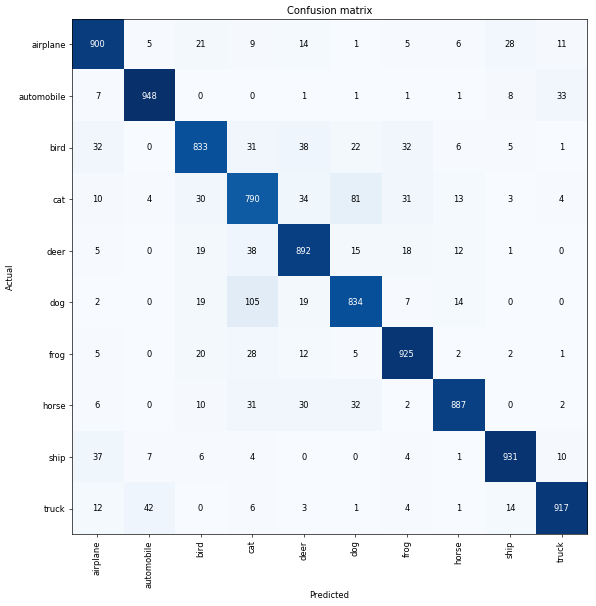

In [26]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

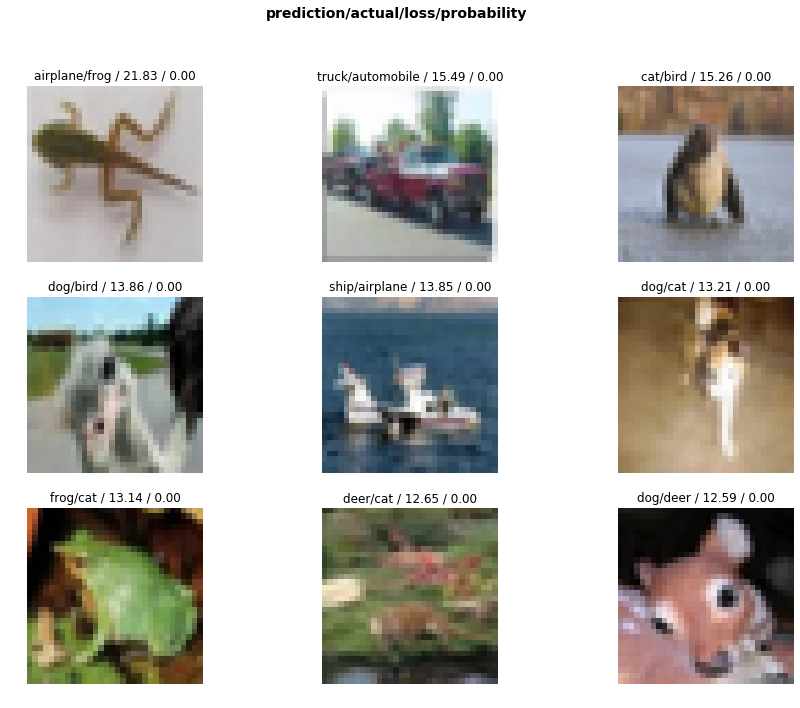

In [35]:
interp.plot_top_losses(9, figsize=(15,11))